# Linear Regression 21MIS1128-T.Akash Reddy

## Model Justification

### The dataset Admission.csv contains only numerical data so it comes under Regression model and there is one dependent variable which is the target column "chance of admit" and remaining columns are the features where the target column depends on these features to predict the chance of admission of any student.

## Importing all the necessary libraries using import commands

In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [23]:
data = pd.DataFrame(pd.read_csv("Admission.csv"))
data.head() ## data.head() is used to show the top 5 records of dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
data.tail() ## data.tail() is used to show the last 5 records of dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


# Pre-Processing the data

## Here in the dataset the column named "Serial No" is usefull so we will remove the column using iloc command

In [25]:
data=data.iloc[:,1:9]
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


## From the above representation we can see the column named "Serial No" has be removed

## We will use describe command to know statistical information of the dataset

In [11]:
data.describe().style.background_gradient(cmap='CMRmap')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.484000,8.576440,0.560000,0.721740
std,11.295148,6.081868,1.143512,0.991004,0.925450,0.604813,0.496884,0.141140
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Checking for null values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## We can clearly see there is no null values in our dataset. 

# Correlation

## Now we will find the correlation for better understanding the relation between the target and feature columns

In [14]:
data.corr(method="pearson")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## We can see chance of admit is highly correlated with GRE score,TOEFL score and CGPA are highly 

## We will try to represent the correlation in diagramatic form

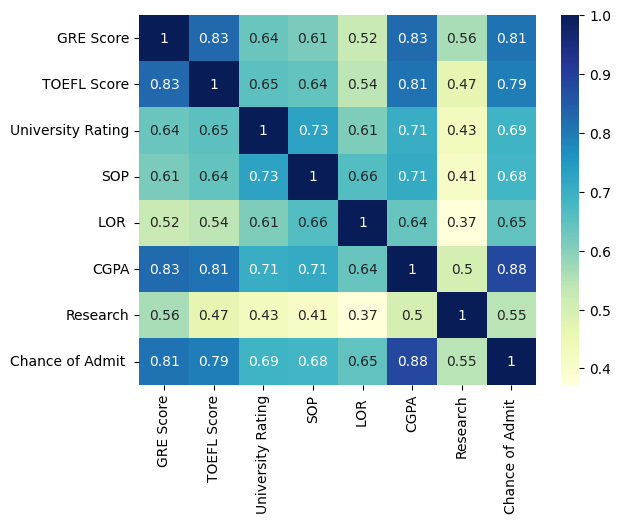

In [16]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Data Visualization

<Axes: xlabel='Research', ylabel='Chance of Admit '>

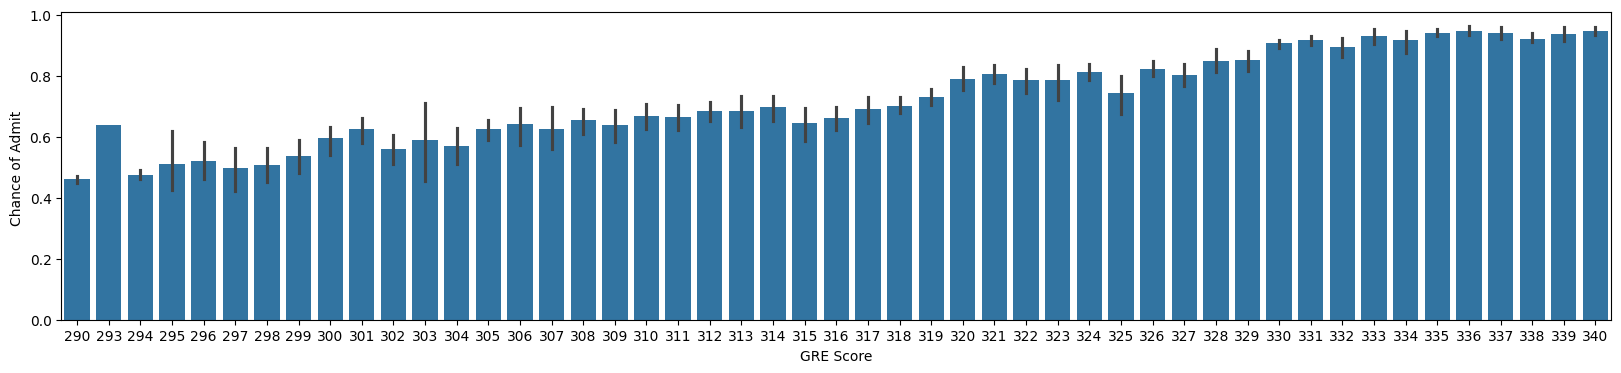

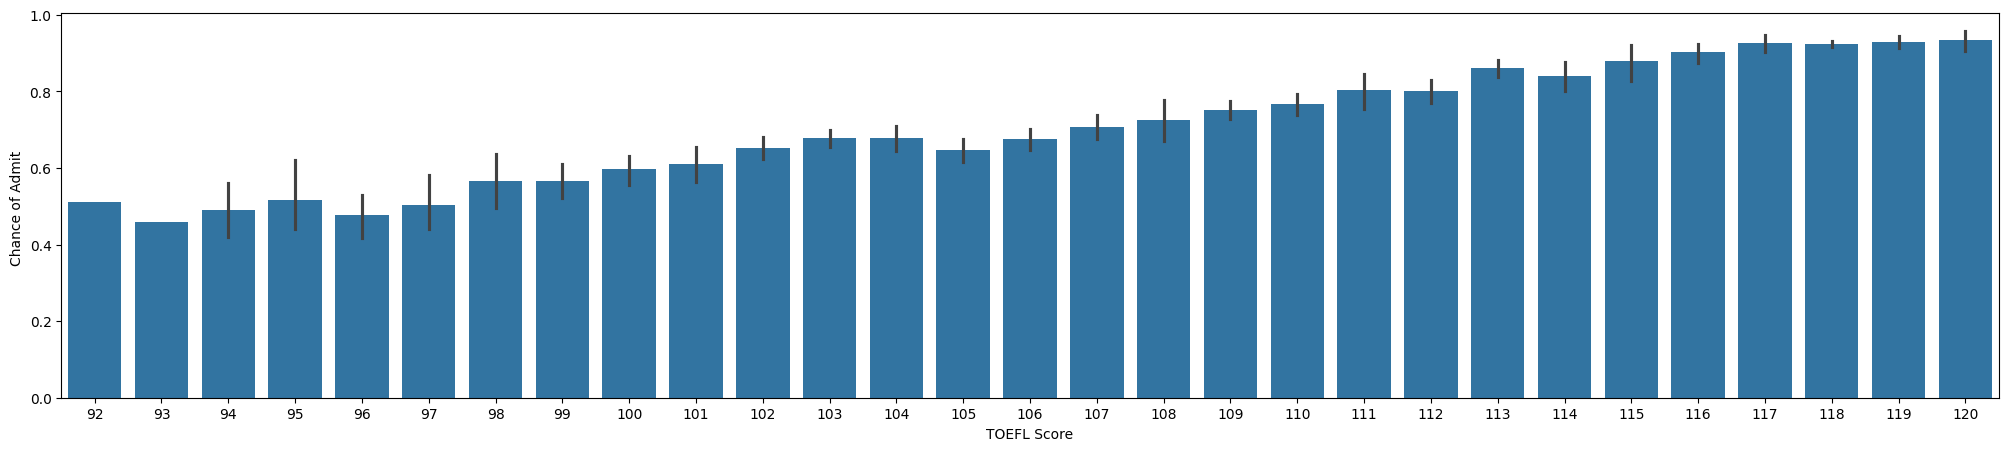

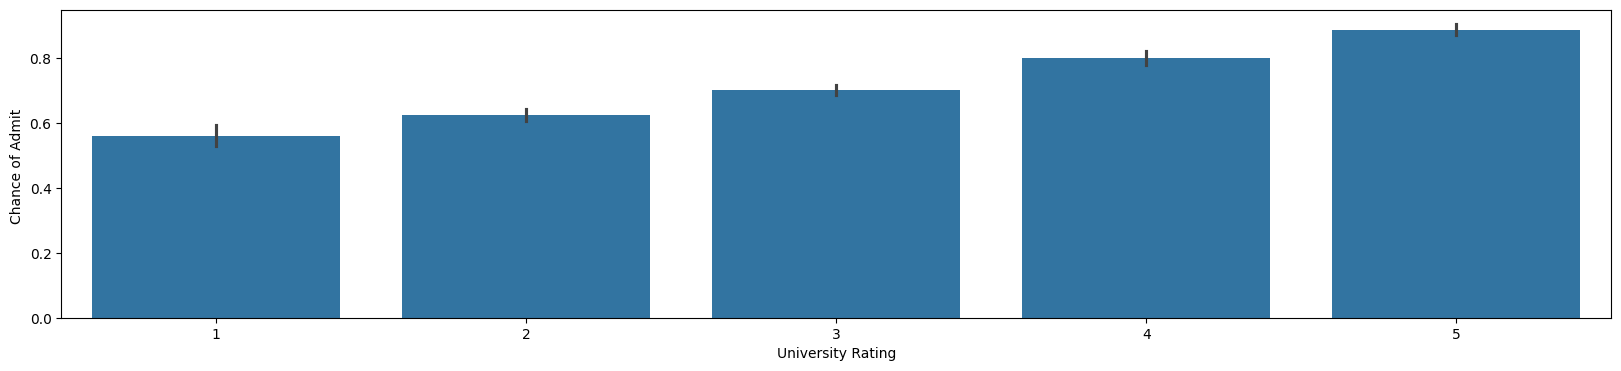

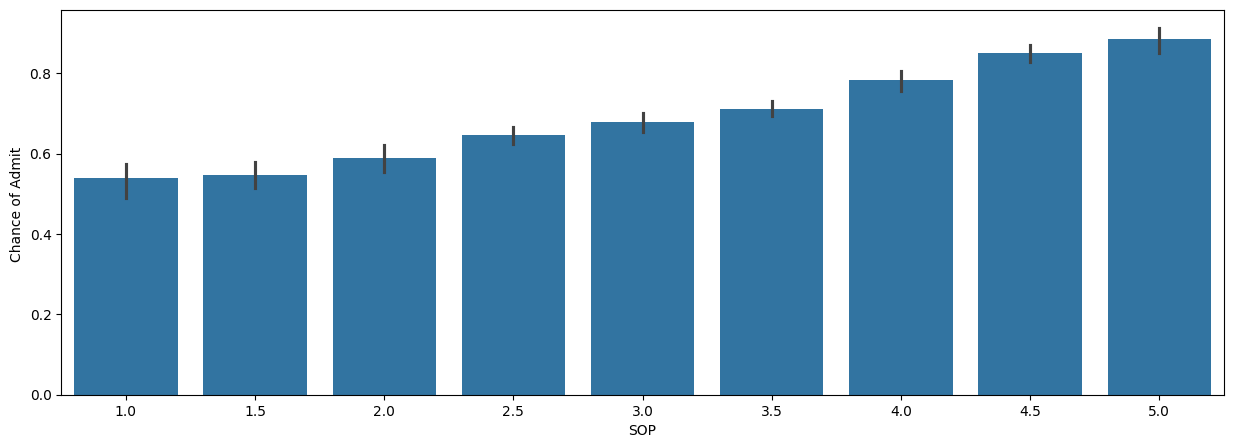

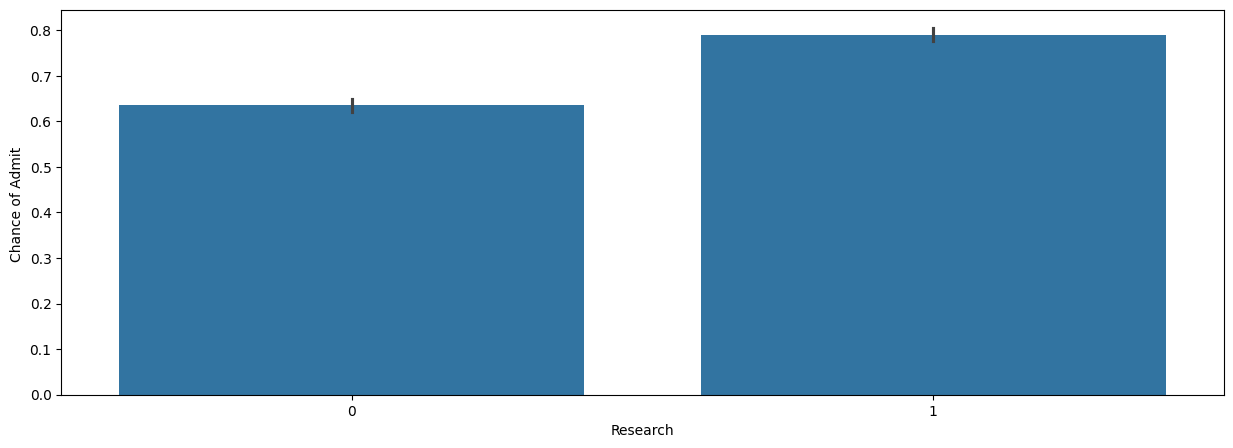

In [29]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=data)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=data)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=data)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=data)
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=data)

# Model Implementation

## Selecting the feature and target variables or columns

In [35]:
X=data.iloc[:,:7] ## X are the feature columns where i have selected expect the last column
y=data["Chance of Admit "] ## Y is the target which is last column of dataset.

In [36]:
print(X.shape)
print(y.shape)
X.head()

(500, 7)
(500,)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


## Split the dataset into test and train datasets, i chose 70% of dataset as training and remaining 30% as test dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
## Lets see the train dataset
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,324,105,3,3.0,4.0,8.75,0
84,340,115,5,4.5,4.5,9.45,1
310,320,104,3,3.0,3.5,8.74,1
494,301,99,3,2.5,2.0,8.45,1
126,323,113,3,4.0,3.0,9.32,1


In [43]:
## Lets see the text dataset
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,328,115,4,4.5,4.0,9.16,1
29,310,99,2,1.5,2.0,7.30,0
471,311,103,3,2.0,4.0,8.09,0
344,295,96,2,1.5,2.0,7.34,0
54,322,110,3,3.0,3.5,8.00,0


## If required we can preprocess our dataset using standard scaler which may helps in improving the accuracy and performance.

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## We have to import the LR model from Skilearn kit which performs the linear regression

In [49]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit( X_train, y_train  )

LinearRegression()

## Model has been fit with the train dataset and will start the prediction using test dataset

In [50]:
y_pred=mdl.predict(X_test)
y_pred

array([0.85936541, 0.47154976, 0.62740186, 0.44916291, 0.64488725,
       0.85685195, 0.58782912, 0.66794686, 0.81367585, 0.68745448,
       0.66556606, 0.60723778, 0.89479135, 0.75501351, 0.63715258,
       0.50465046, 0.59340591, 0.74838099, 0.55739549, 0.70380753,
       0.89677038, 0.61197102, 0.84931353, 0.82671874, 0.99640023,
       0.60241011, 0.68227615, 0.93605022, 0.87923201, 0.70094354,
       0.79069517, 0.85227995, 0.74971101, 0.55178144, 0.74092954,
       0.78165518, 0.79780603, 0.57713873, 0.53955108, 0.70194418,
       0.9480288 , 0.59272774, 0.83702884, 0.78650937, 0.81290961,
       0.54763814, 0.59934992, 0.87430343, 0.95128842, 0.59930932,
       0.81741287, 0.70998511, 0.80681731, 0.98980301, 0.64832477,
       0.85721302, 0.62064956, 0.89702508, 0.77235989, 0.73627749,
       0.68757233, 0.62670226, 0.47985664, 0.88487044, 0.65242591,
       0.68471638, 0.70603958, 0.46344729, 0.83829704, 0.84603085,
       0.92895945, 0.77539899, 0.6568539 , 0.83567064, 0.64764

## These are the predicted Y(Chance of admit) values for the feature values(X)

# Model Evaluation

## We will import R-squared and mean absolute error functions from skilearnkit

In [52]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))

R2 score of the model is  0.8191205634561675
mean_absolute_error  of the model is  0.04548966107627507


## Model score

In [55]:
score = mdl.score( X_test, y_test )

print(score * 100)

83.5571763485012


## Model score for test dataset is 83.55%

In [57]:
score = mdl.score( X_train, y_train )

print(score * 100)

81.32510822066584


## Model score for train dataset is 81.32%

## We will visualize the actual and predicted values for the chance of admit 

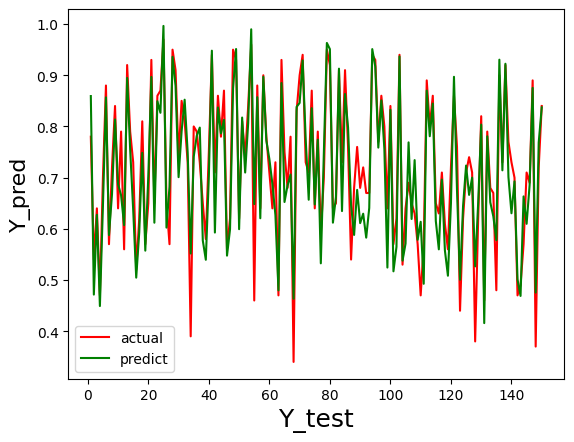

In [59]:
# Plotting y_test and y_pred 
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r', linestyle='-',label='actual')
plt.plot(c,y_pred,color='g', linestyle='-',label='predict')
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('Y_pred', fontsize = 16)
plt.legend()
plt.show()

# Final Interpretation

### 1) Successfully implemented Linear regression for the given dataset
### 2) Used correlation to find with which columns the target column is higly correlated and found that chance of admit is highly correlated with GRE,TOEFL,CGPA 
### 3)The R^2 value is 0.81 and mean squared error is 0.045 whcih means the error percentage is less and model is pretty good.
### 4) The model score or accuracy for train dataset is 81.325 % and for test dataset is 83.55 % where our model is working good enough on both the datasets
### 5) Finally used a plot to spot the differnce between actual and predicted value for chance of admit where red is actual and green is predicted, we can see there is no much difference a little variation is able to seen